# 1.  IMPORTING LIBRARIES



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import stemgraphic

# 2. IMPORTING DATASET 
We will now read the data from a Excel file into a Pandas DataFrame

In [2]:
df=pd.read_excel("RollingDataSet.xlsx")


Lets have a look on information about the dataset using df.info().It gives details about number of columns and their names,rows ,total number of entries and their datatypes.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ReheatingTime   975 non-null    int64  
 1   RollDia         975 non-null    float64
 2   RollCrown       975 non-null    float64
 3   EntryThickness  974 non-null    float64
 4   Width           974 non-null    float64
 5   Length          974 non-null    float64
 6   Temperature     974 non-null    float64
 7   Speed           974 non-null    float64
 8   WaitTime        974 non-null    float64
 9   Redn            974 non-null    float64
 10  Strain          974 non-null    float64
 11  strainrate      974 non-null    float64
 12  Flowstress      974 non-null    float64
 13  Force           974 non-null    float64
 14  Torque          974 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 114.4 KB
None


Let us have a look at how our dataset looks like using df.head()



In [4]:
df.head()

ReheatingTime   RollDia  RollCrown  EntryThickness    Width  Length  \
0            205  1120.265     210.25          250.00  2232.66  4131.0   
1            205  1120.265     210.25          226.60  4139.90  2503.0   
2            205  1120.265     210.25          209.90  4139.48  2642.0   
3            205  1120.265     210.25             NaN      NaN     NaN   
4            205  1120.265     210.25          194.05  2611.11  4820.0   

   Temperature  Speed  WaitTime  Redn    Strain  strainrate  Flowstress   \
0       1128.0   1.93      73.0  0.09  0.113478    1.580501    49.890525   
1       1121.0   1.72      46.0  0.07  0.088398    1.291303    44.741260   
2       1114.0   1.74       7.0  0.08  0.090662    1.364362    47.653062   
3          NaN    NaN       NaN   NaN       NaN         NaN          NaN   
4       1105.0   2.02      31.0  0.16  0.194912    2.511538    64.105765   

     Force  Torque  
0  23908.0  3528.0  
1  35748.0  4515.0  
2  39327.0  5028.0  
3      NaN     NaN  
4  33462.0  5366.0

# 3.DATASET CLEANING
**3.1 Check For Missing Values**

   Check is there any null value in given dataset using df.isnull().Replace it with mean value if you have lesser data points or you can completely drop that row if you have large dtapoints.

In [5]:
df.isnull()

ReheatingTime  RollDia  RollCrown  EntryThickness  Width  Length  \
0            False    False      False           False  False   False   
1            False    False      False           False  False   False   
2            False    False      False           False  False   False   
3            False    False      False            True   True    True   
4            False    False      False           False  False   False   
..             ...      ...        ...             ...    ...     ...   
970          False    False      False           False  False   False   
971          False    False      False           False  False   False   
972          False    False      False           False  False   False   
973          False    False      False           False  False   False   
974          False    False      False           False  False   False   

     Temperature  Speed  WaitTime   Redn  Strain  strainrate  Flowstress   \
0          False  False     False  False   False       False        False   
1          False  False     False  False   False       False        False   
2          False  False     False  False   False       False        False   
3           True   True      True   True    True        True         True   
4          False  False     False  False   False       False        False   
..           ...    ...       ...    ...     ...         ...          ...   
970        False  False     False  False   False       False        False   
971        False  False     False  False   False       False        False   
972        False  False     False  False   False       False        False   
973        False  False     False  False   False       False        False   
974        False  False     False  False   False       False        False   

     Force  Torque  
0    False   False  
1    False   False  
2    False   False  
3     True    True  
4    False   False  
..     ...     ...  
970  False   False  
971  False   False  
972  False   False  
973  False   False  
974  False   False  

[975 rows x 15 columns]

**3.2 Dropping the missing values**

Since this dataset has large datapoints I have droped the corresponding rows with null values using df.dropna()


In [6]:
ndf=df.dropna()
ndf.head()

ReheatingTime   RollDia  RollCrown  EntryThickness    Width  Length  \
0            205  1120.265     210.25          250.00  2232.66  4131.0   
1            205  1120.265     210.25          226.60  4139.90  2503.0   
2            205  1120.265     210.25          209.90  4139.48  2642.0   
4            205  1120.265     210.25          194.05  2611.11  4820.0   
5            205  1120.265     210.25          163.91  2620.27  5748.0   

   Temperature  Speed  WaitTime  Redn    Strain  strainrate  Flowstress   \
0       1128.0   1.93      73.0  0.09  0.113478    1.580501    49.890525   
1       1121.0   1.72      46.0  0.07  0.088398    1.291303    44.741260   
2       1114.0   1.74       7.0  0.08  0.090662    1.364362    47.653062   
4       1105.0   2.02      31.0  0.16  0.194912    2.511538    64.105765   
5       1105.0   2.06       8.0  0.18  0.234544    3.077812    70.022909   

     Force  Torque  
0  23908.0  3528.0  
1  35748.0  4515.0  
2  39327.0  5028.0  
4  33462.0  5366.0  
5  34806.0  5401.0

**3.3 Checking For Duplicate Values**

we can check for duplicate values present in our dataset using ndf.duplicated().There are total rows which are duplicate here so we can drop these rows.

In [7]:
duplicate =ndf.duplicated()
print('Number of Duplicates are :',duplicate.sum(),'\n','Duplicate rows are:')
ndf[duplicate]

Number of Duplicates are : 4 
 Duplicate rows are:


ReheatingTime   RollDia  RollCrown  EntryThickness    Width   Length  \
13             205  1120.265     210.25           33.08  2613.28  27621.0   
15             205  1120.265     210.25           24.88  2607.28  35139.0   
96            1188  1120.265     215.25          116.99  2152.16   5421.0   
101            246  1120.265     215.85          250.00  1632.19   3024.0   

     Temperature  Speed  WaitTime  Redn    Strain  strainrate  Flowstress   \
13         939.0   3.94       7.0  0.14  0.177765    9.418499   122.253654   
15         889.0   4.55       6.0  0.10  0.124861    9.378152   116.782462   
96        1113.0   2.06       8.0  0.22  0.290602    4.067613    59.945744   
101       1126.0   1.68      73.0  0.09  0.114089    1.382774    49.458941   

       Force  Torque  
13   32508.0  1753.0  
15   28559.0  1174.0  
96   29636.0  3854.0  
101  16687.0  2543.0

**3.4 Dropping Duplicate values**

I have dropped the duplicate rows using ndf.drop_duplicates()

In [8]:
ndf.drop_duplicates(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
duplicate =ndf.duplicated()
print('Number of Duplicates are :',duplicate.sum())

Number of Duplicates are : 0


In [10]:
ndf.describe()

ReheatingTime      RollDia   RollCrown  EntryThickness        Width  \
count     970.000000   970.000000  970.000000      970.000000   970.000000   
mean      257.834021  1079.887866   88.586804      132.436495  2625.977722   
std       109.917589    28.834364   67.632662       75.249053   504.301629   
min       135.000000  1042.705000    0.300000       15.200000  1613.430000   
25%       206.000000  1045.910000   28.900000       59.307500  2440.260000   
50%       255.000000  1082.875000   96.700000      127.240000  2611.800000   
75%       281.000000  1115.270000  102.000000      201.817500  2720.560000   
max      1188.000000  1120.265000  216.650000      250.000000  4181.900000   

             Length  Temperature       Speed    WaitTime        Redn  \
count    970.000000   970.000000  970.000000  970.000000  970.000000   
mean    8097.288660  1085.572165    2.164979   23.631959    0.160062   
std     7386.815261    81.081438    0.714985   32.651577    0.069921   
min     1794.000000   889.000000    1.500000    6.000000    0.020000   
25%     2986.000000  1015.000000    1.700000    7.000000    0.110000   
50%     5115.500000  1117.000000    1.830000    8.000000    0.150000   
75%    10530.500000  1140.000000    2.380000   28.000000    0.190000   
max    38139.000000  1233.000000    5.600000  225.000000    0.380000   

           Strain  strainrate  Flowstress          Force       Torque  
count  970.000000  970.000000   970.000000    970.000000   970.000000  
mean     0.205981    4.336922    78.554077  29050.963918  3169.239175  
std      0.099725    3.369094    28.609882   8102.235349  1253.052573  
min      0.021491    0.573413    22.518401   7899.000000   683.000000  
25%      0.139637    1.757077    56.016647  25386.750000  2036.250000  
50%      0.192003    3.331664    71.142387  29712.000000  3336.000000  
75%      0.249092    5.592582   102.672830  33720.250000  4143.750000  
max      0.554531   16.247240   163.111281  59433.000000  5968.000000

# 4. HISTOGRAM ,BOX PLOTS, STEM AND LEAF DIAGRAM

A histogram is a graph showing frequency distributions.
It is a graph showing the number of observations within each given interval.
Here we will plot histogram plot for all the columns using below for loop.

C:\Users\admin\AppData\Local\Temp/ipykernel_12324/1290286539.py:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom = 0.2,wspace=0.5)
C:\Users\admin\AppData\Local\Temp/ipykernel_12324/1290286539.py:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom = 0.2,wspace=0.5)
C:\Users\admin\AppData\Local\Temp/ipykernel_12324/1290286539.py:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom = 0.2,wspace=0.5)
C:\Users\admin\AppData\Local\Temp/ipykernel_12324/1290286539.py:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling con

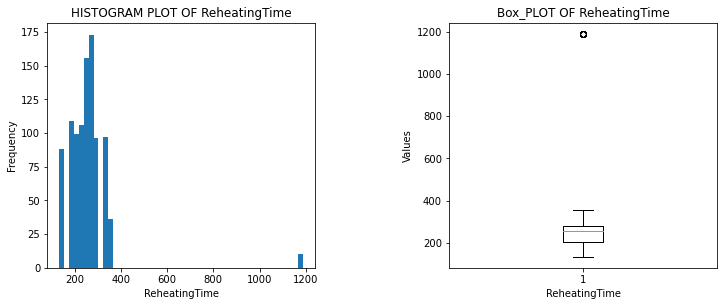

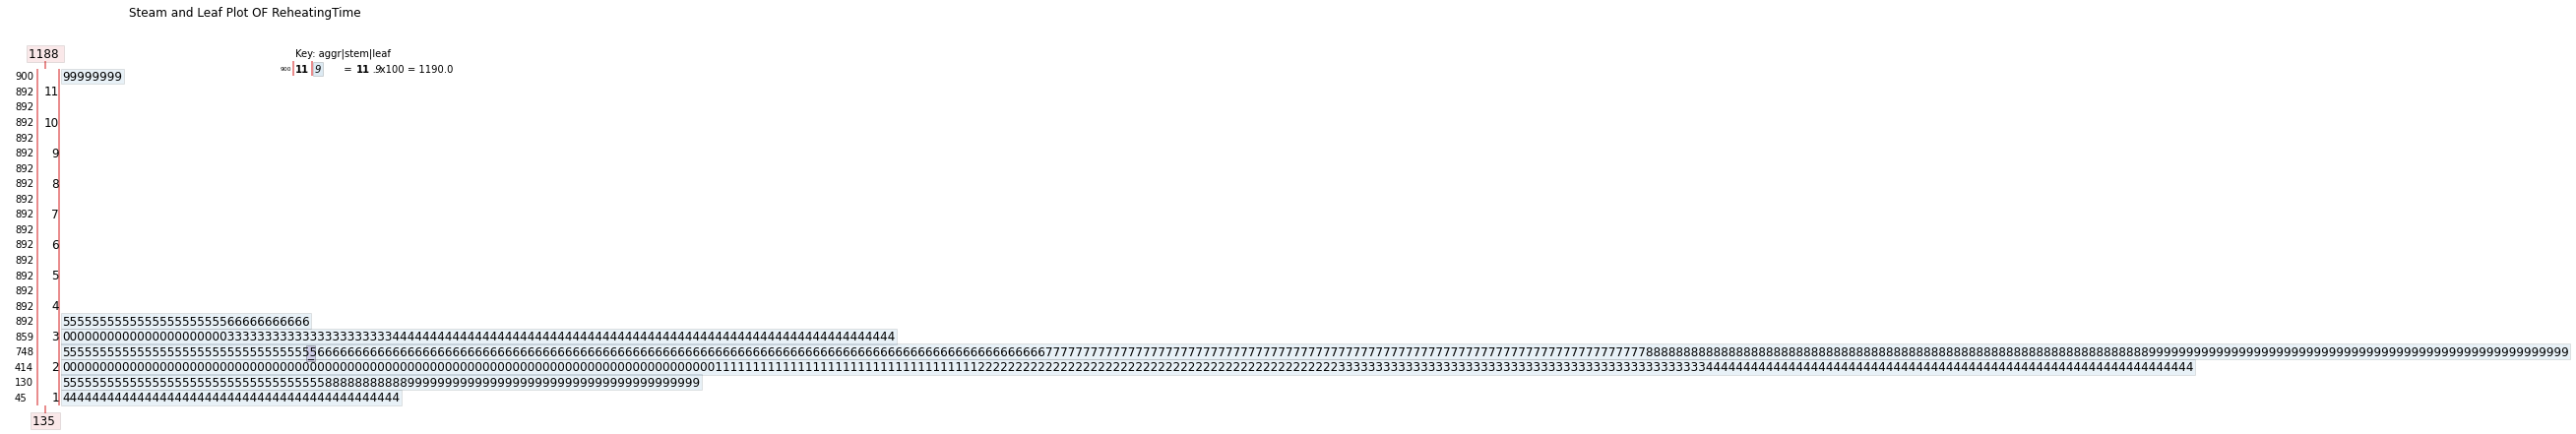

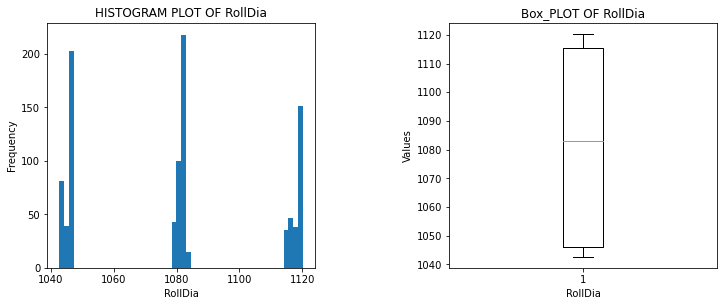

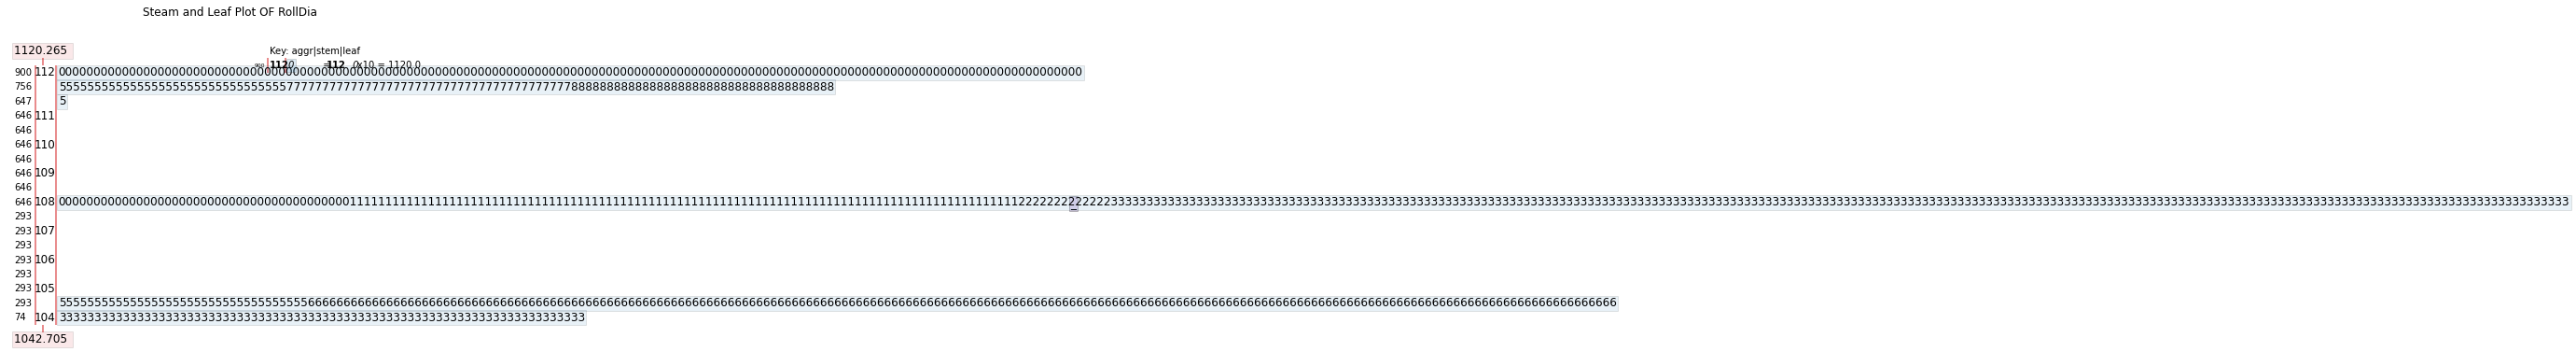

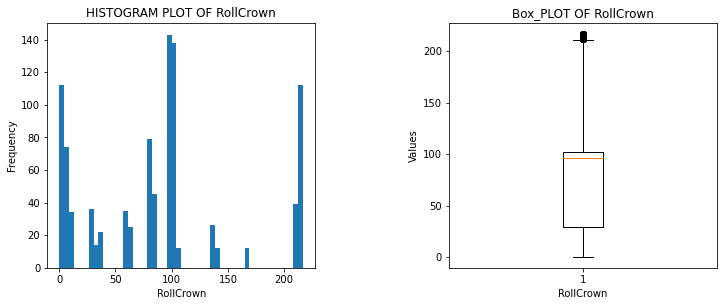

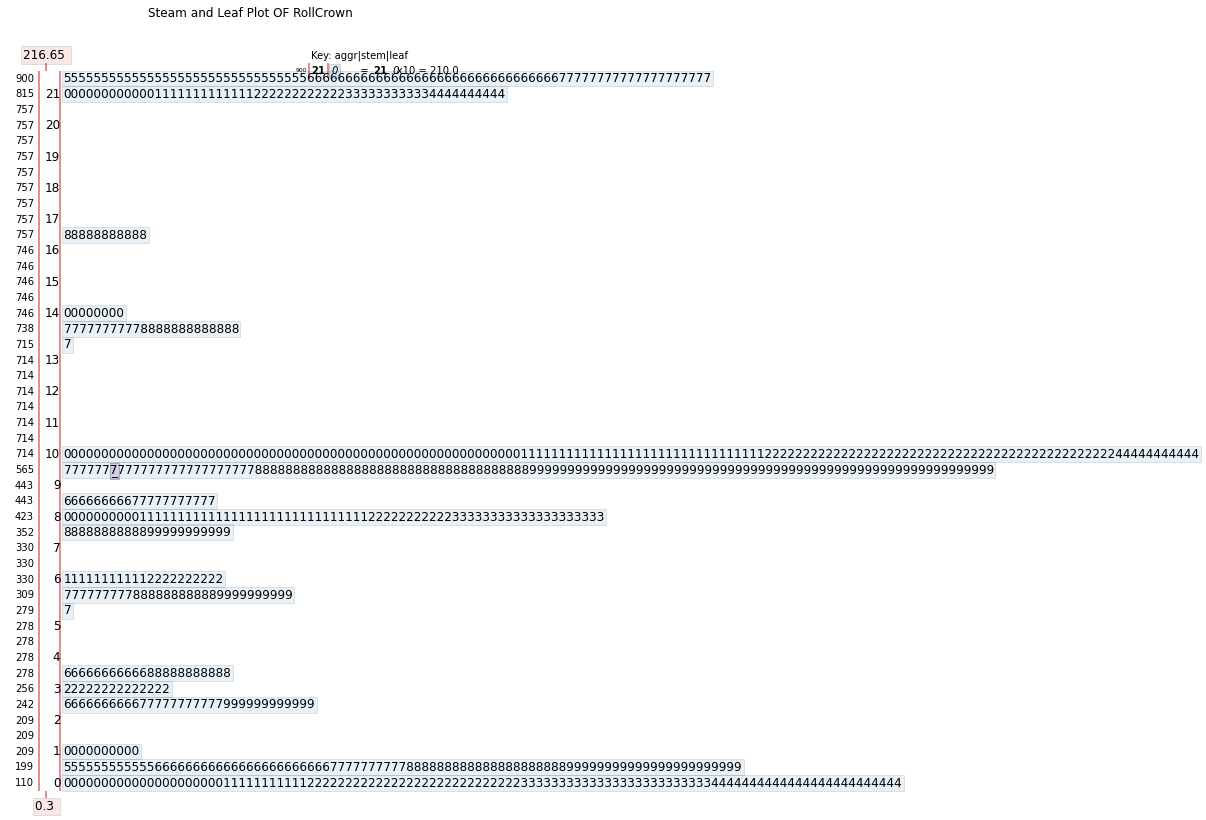

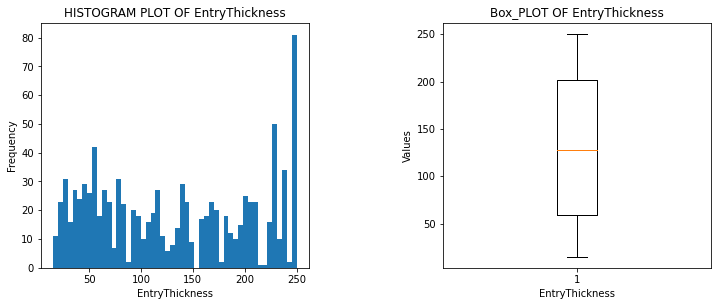

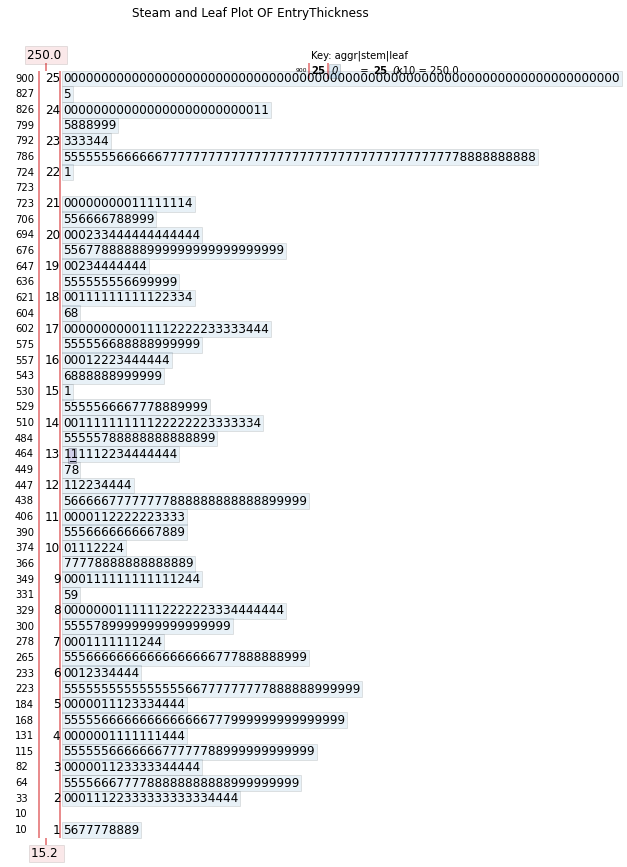

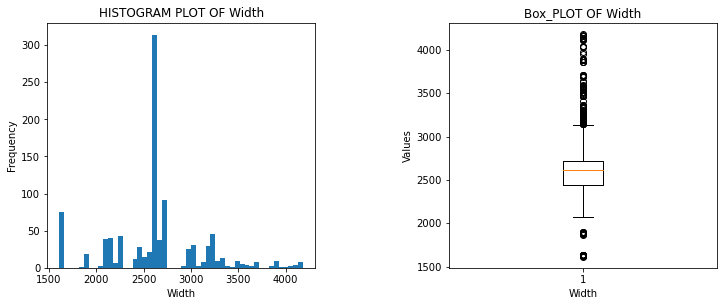

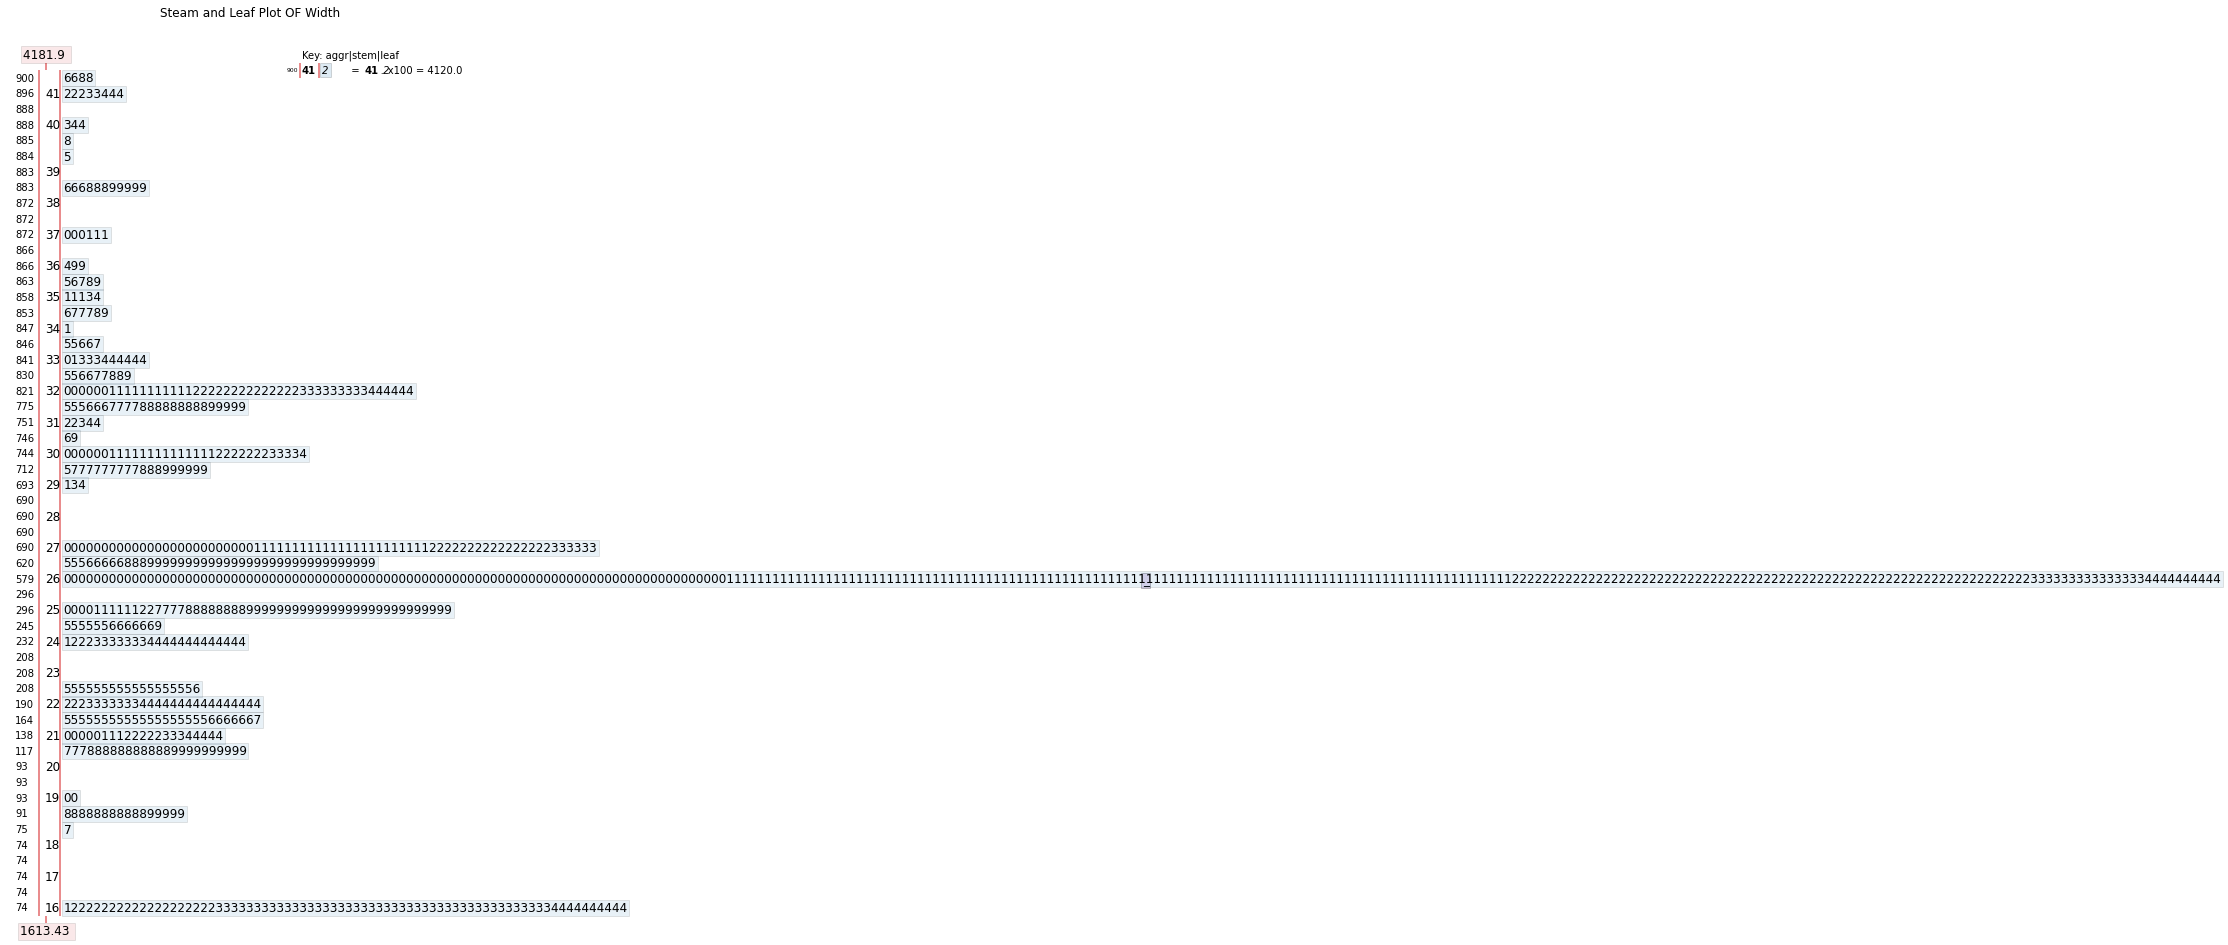

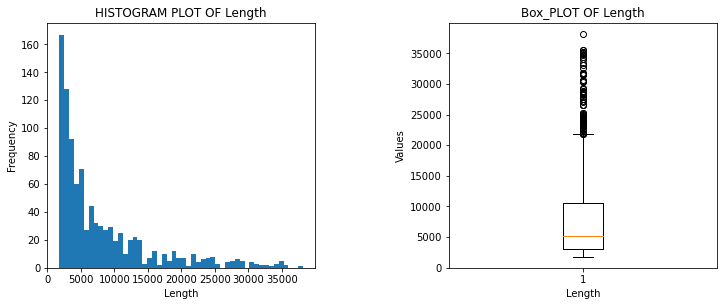

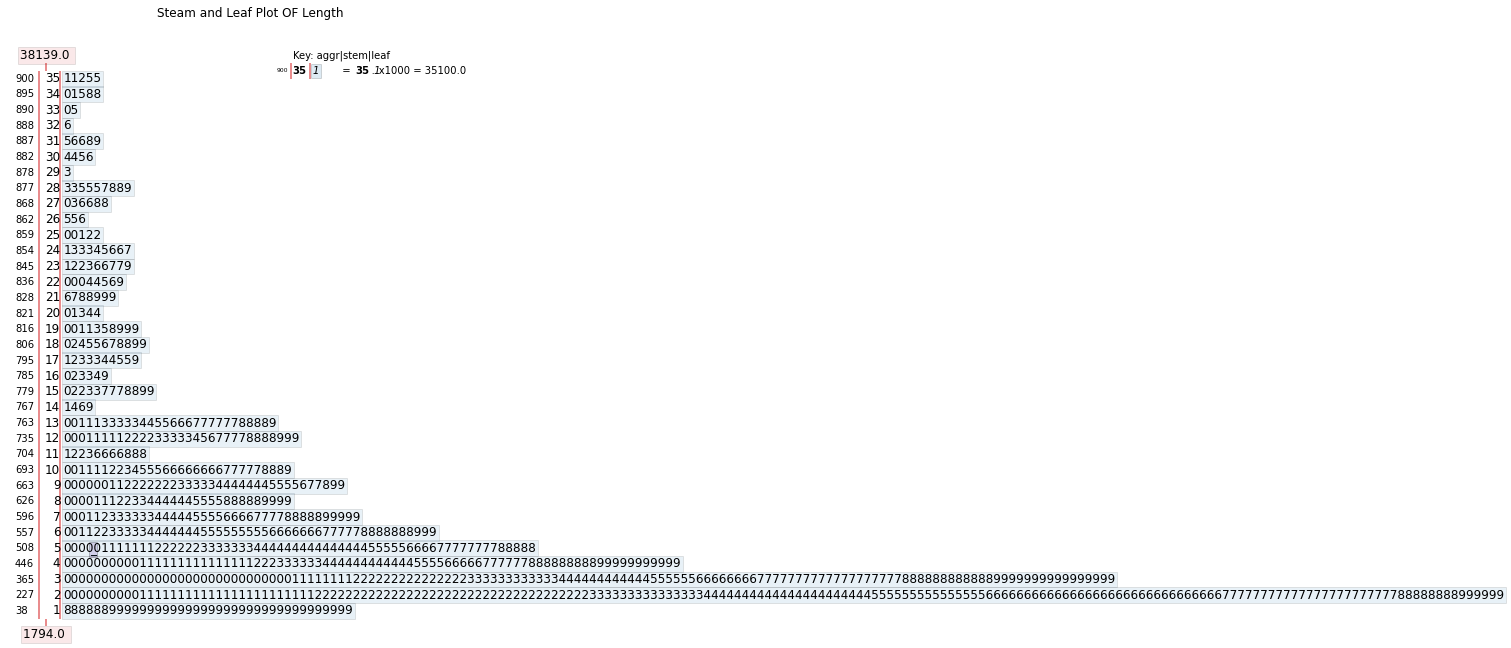

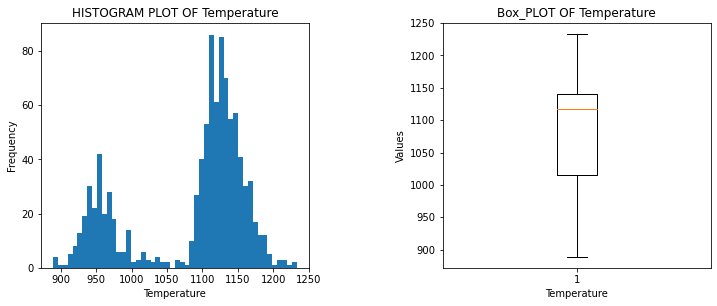

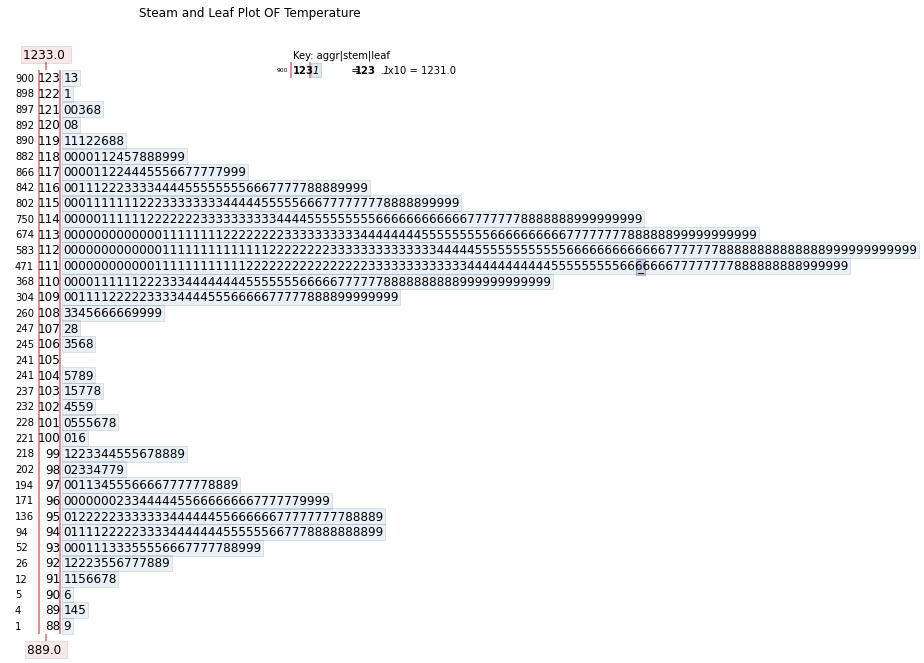

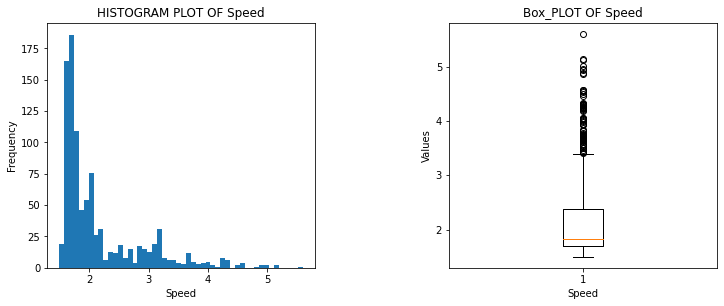

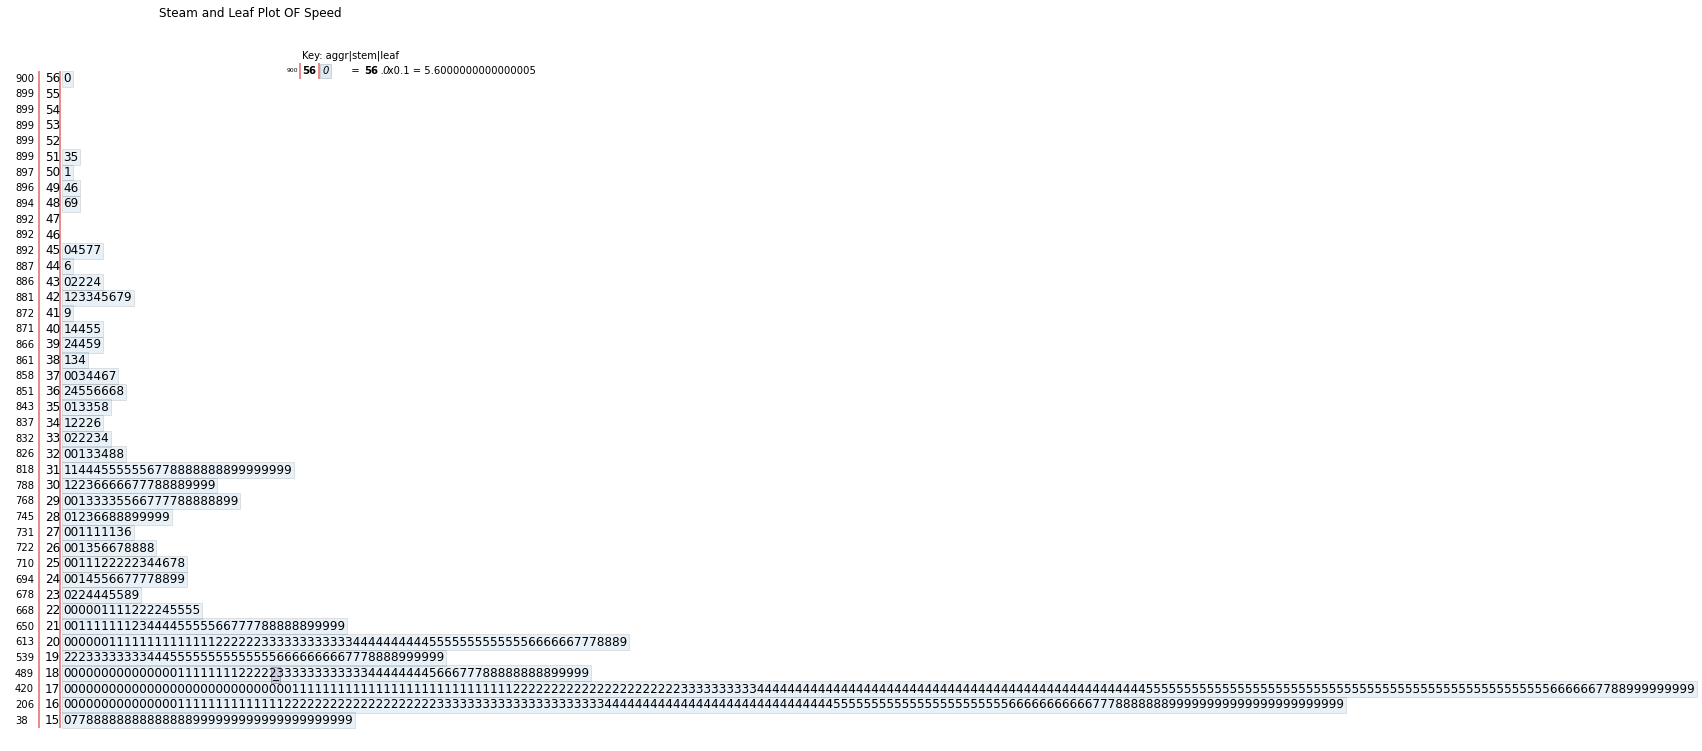

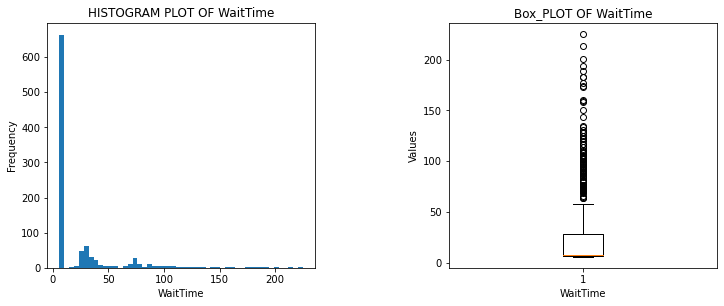

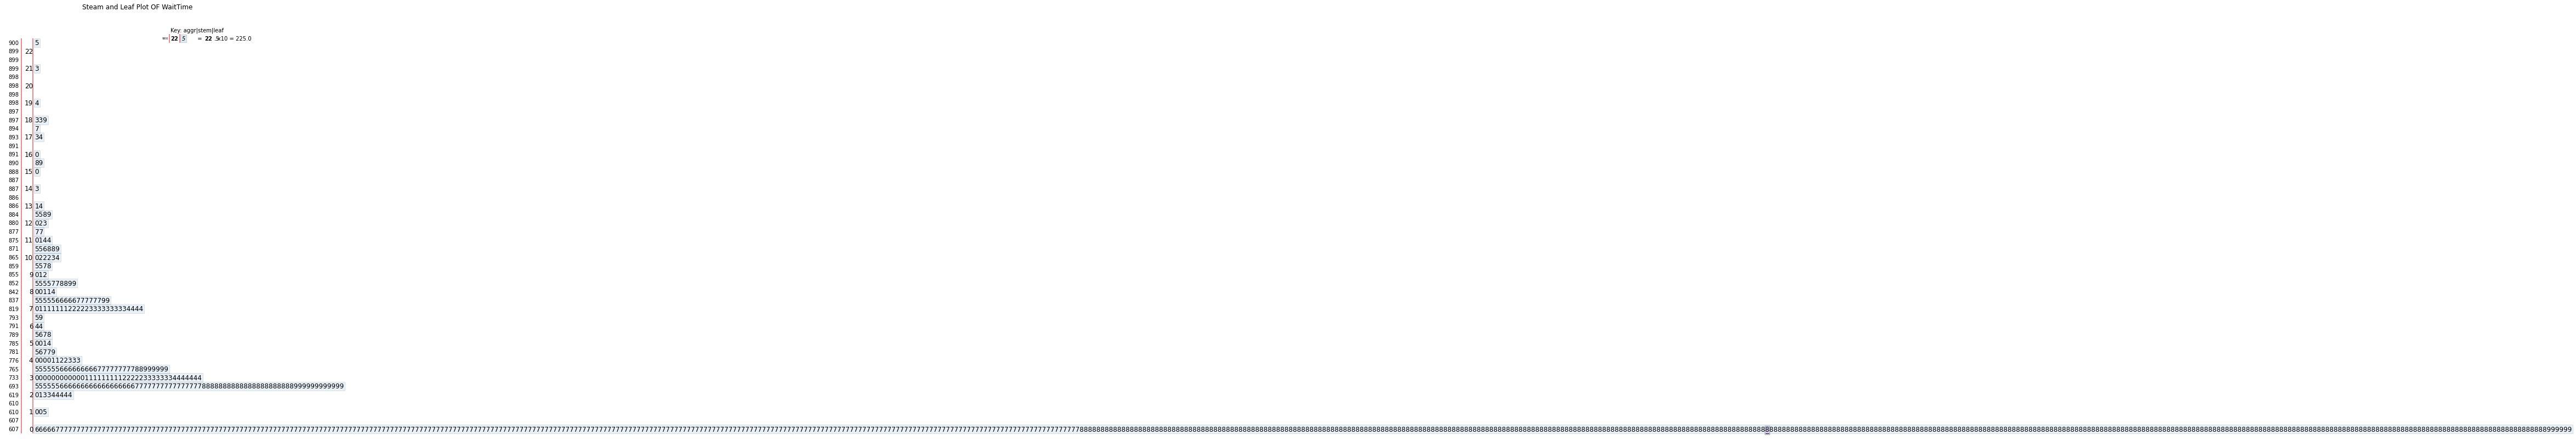

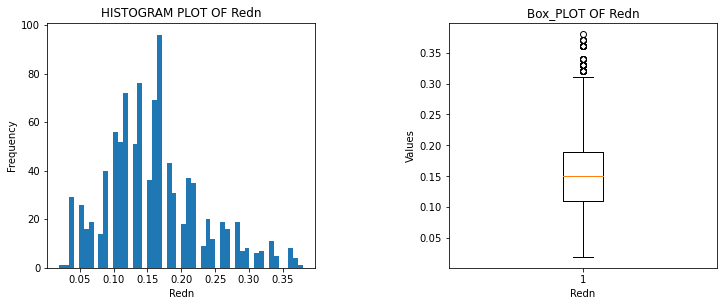

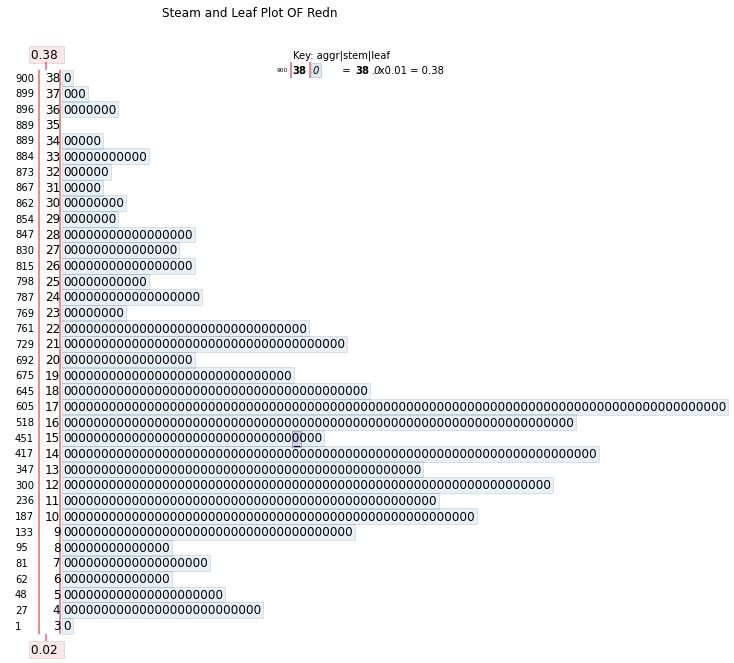

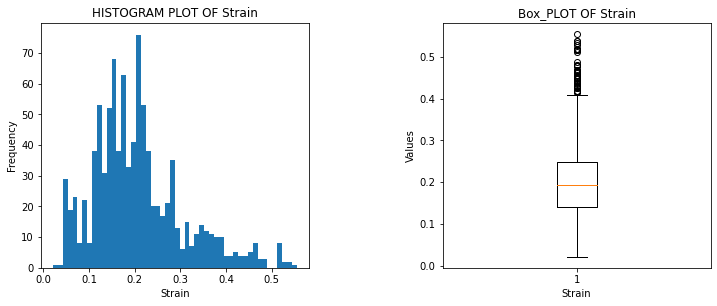

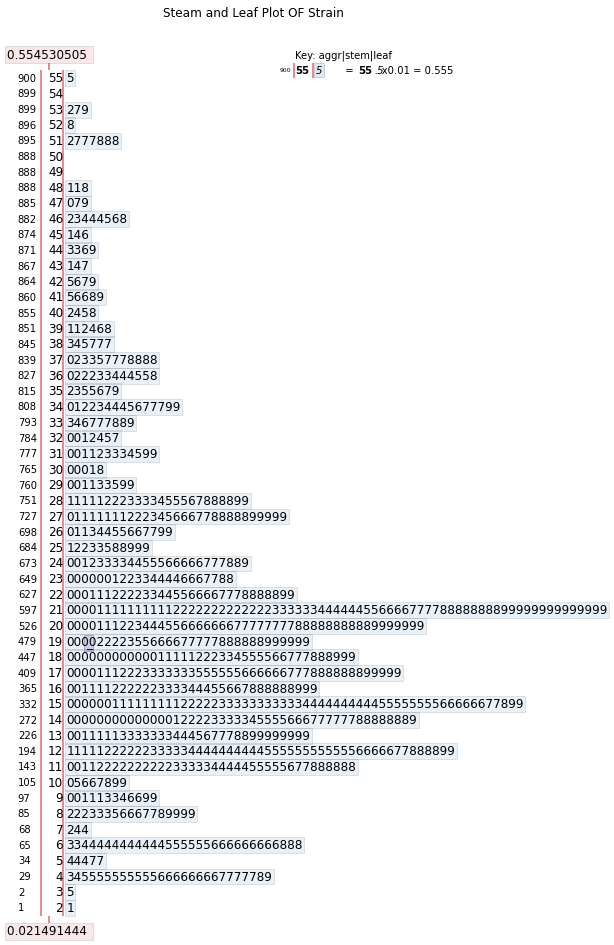

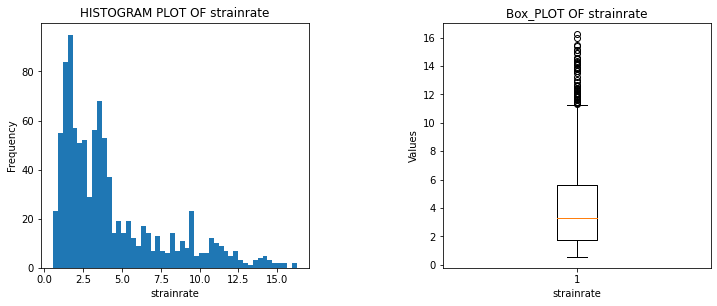

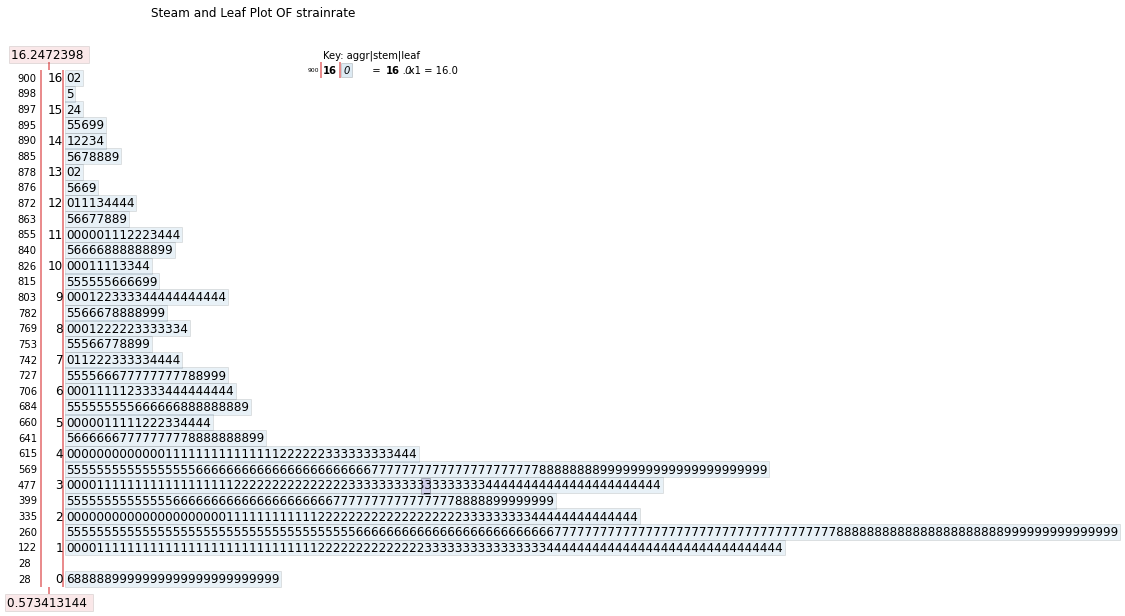

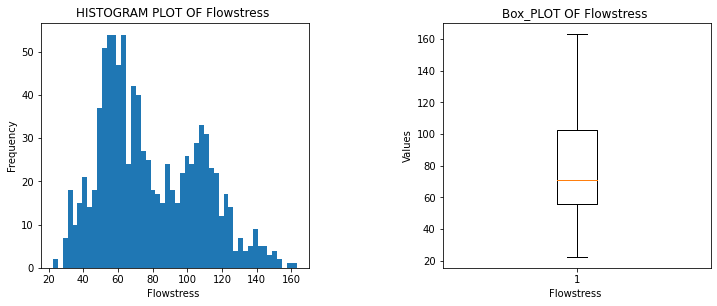

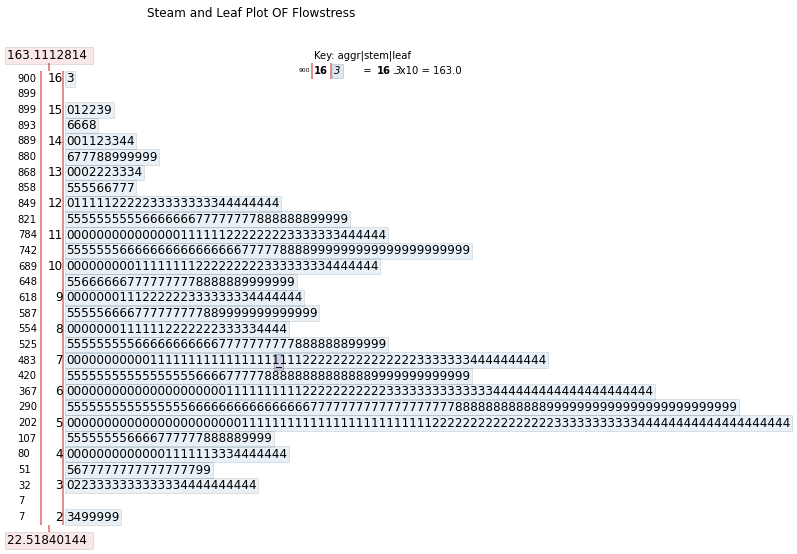

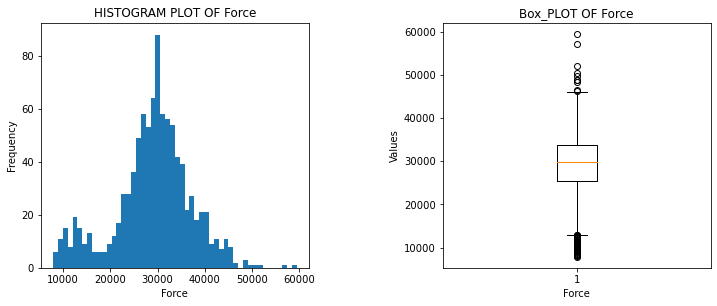

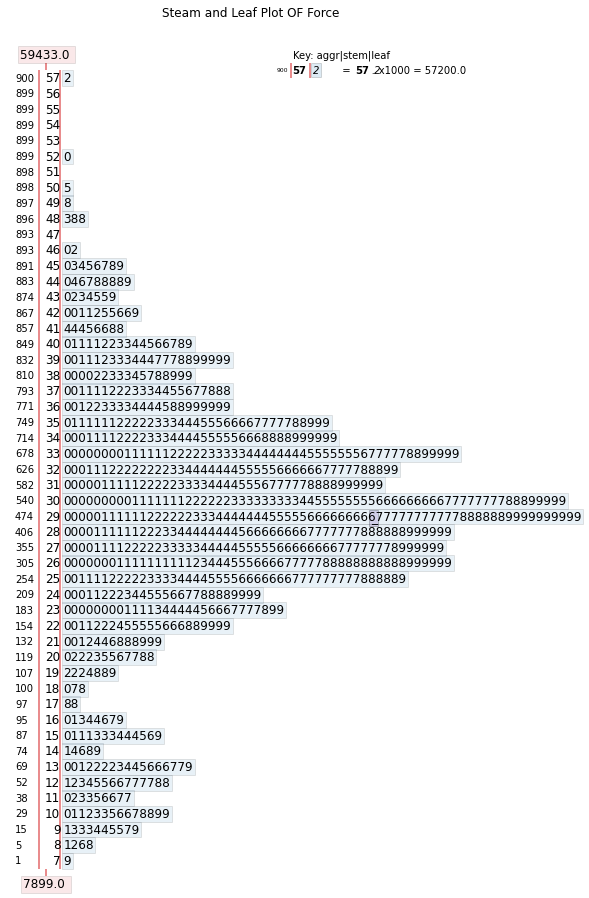

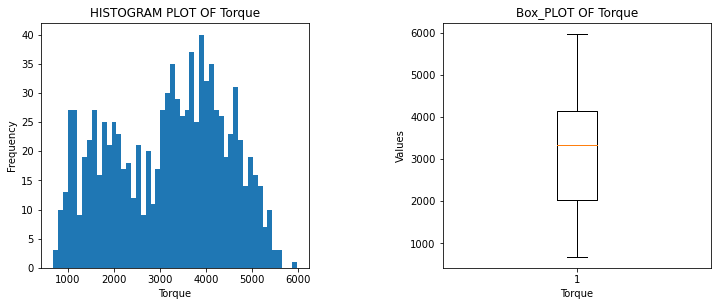

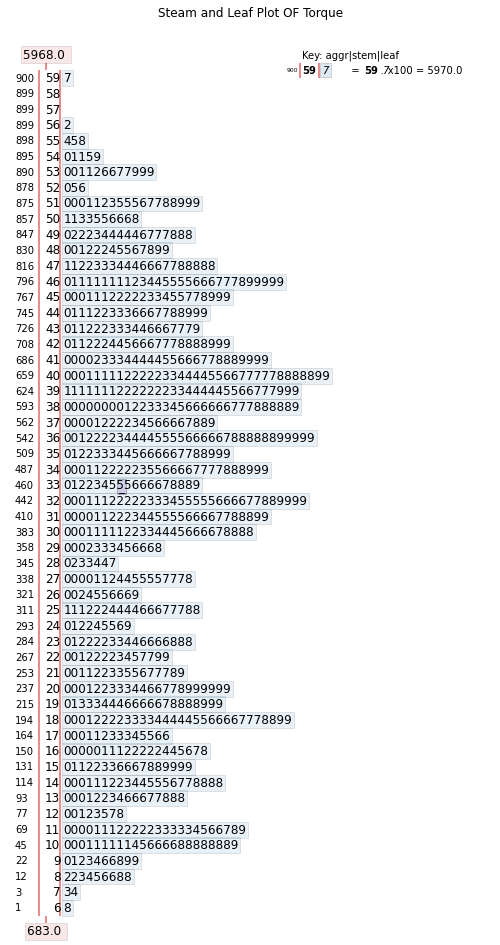

In [11]:
column=list(ndf.columns)
for i in column: 
    fig, (ax1, ax2) = plt.subplots(1, 2,constrained_layout = True)
    plt.subplots_adjust(bottom = 0.2,wspace=0.5)
    

    fig.set_figheight(5)
    fig.set_figwidth(12)

    #plt.figure(figsize=(4,4))
    ax1.hist(ndf[i],bins=50)
    ax1.set_xlabel(str(i))
    ax1.set_ylabel('Frequency')
    ax1.set_title('HISTOGRAM PLOT OF '+ str(i))
    

    #plt.savefig('Hist'+str(i)+'.png')
    
    #plt.figure(figsize=(4,4))
    ax2.boxplot(ndf[i])
    ax2.set_xlabel(str(i))
    ax2.set_ylabel('Values')
    ax2.set_title('Box_PLOT OF '+ str(i))
    #fig.savefig('Hist And box Plot for '+ str(i) +'.png')
    

    #plt.savefig('Box_'+str(i) + '.png')
    
   
    stemgraphic.stem_graphic(ndf[i])
    plt.title('Steam and Leaf Plot OF '+ str(i))
    #plt.savefig('Steam & Leaf '+str(i)+'.png')
    #plt.savefig('Steam & Leaf '+str(i)+'.png')
    

In [12]:
ndf.describe()

ReheatingTime      RollDia   RollCrown  EntryThickness        Width  \
count     970.000000   970.000000  970.000000      970.000000   970.000000   
mean      257.834021  1079.887866   88.586804      132.436495  2625.977722   
std       109.917589    28.834364   67.632662       75.249053   504.301629   
min       135.000000  1042.705000    0.300000       15.200000  1613.430000   
25%       206.000000  1045.910000   28.900000       59.307500  2440.260000   
50%       255.000000  1082.875000   96.700000      127.240000  2611.800000   
75%       281.000000  1115.270000  102.000000      201.817500  2720.560000   
max      1188.000000  1120.265000  216.650000      250.000000  4181.900000   

             Length  Temperature       Speed    WaitTime        Redn  \
count    970.000000   970.000000  970.000000  970.000000  970.000000   
mean    8097.288660  1085.572165    2.164979   23.631959    0.160062   
std     7386.815261    81.081438    0.714985   32.651577    0.069921   
min     1794.000000   889.000000    1.500000    6.000000    0.020000   
25%     2986.000000  1015.000000    1.700000    7.000000    0.110000   
50%     5115.500000  1117.000000    1.830000    8.000000    0.150000   
75%    10530.500000  1140.000000    2.380000   28.000000    0.190000   
max    38139.000000  1233.000000    5.600000  225.000000    0.380000   

           Strain  strainrate  Flowstress          Force       Torque  
count  970.000000  970.000000   970.000000    970.000000   970.000000  
mean     0.205981    4.336922    78.554077  29050.963918  3169.239175  
std      0.099725    3.369094    28.609882   8102.235349  1253.052573  
min      0.021491    0.573413    22.518401   7899.000000   683.000000  
25%      0.139637    1.757077    56.016647  25386.750000  2036.250000  
50%      0.192003    3.331664    71.142387  29712.000000  3336.000000  
75%      0.249092    5.592582   102.672830  33720.250000  4143.750000  
max      0.554531   16.247240   163.111281  59433.000000  5968.000000

# 5. PAIRPLOT

Pairplot represents pairwise relation across the entire dataframe and supports an additional argument called hue for categorical separation. What it does basically is create a jointplot between every possible numerical column. It is plotted using the pairplot() method.


In [13]:
#sns.pairplot(ndf)
#plt.savefig('Pairplot.png')

# 6.CORRELATION USING HEATMAP

We can use a Heatmap to Visualize the Correlation Between Variables.A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used


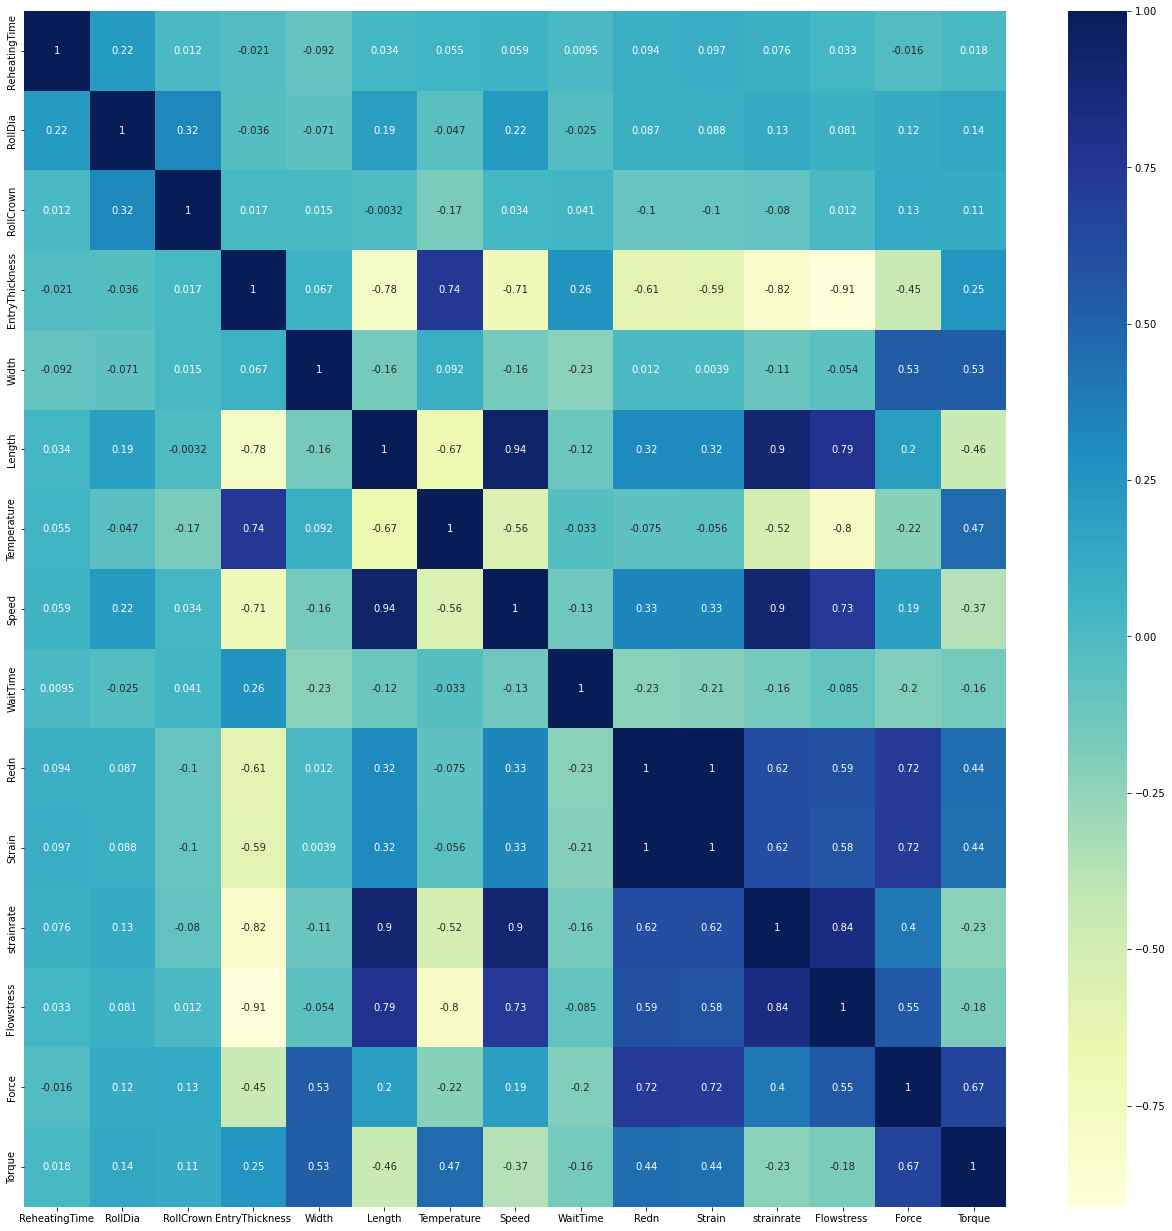

In [14]:
figure_name = plt.figure(figsize=(22,22))
dataplot = sns.heatmap(ndf.corr(), cmap="YlGnBu", annot=True)
#plt.savefig('Heat_Map.png')

# 7.HIGH CORREALATION PLOTS

Here we will plot regression plot between  the variables those are highly correlated with each other.


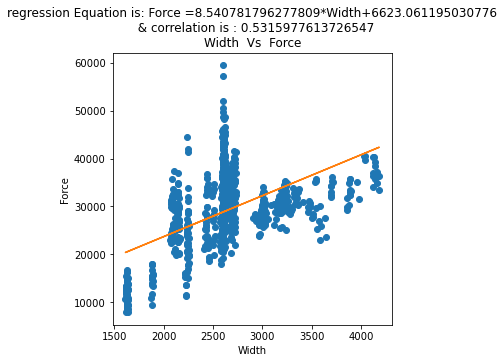

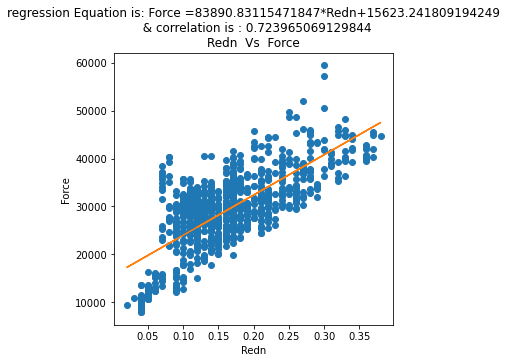

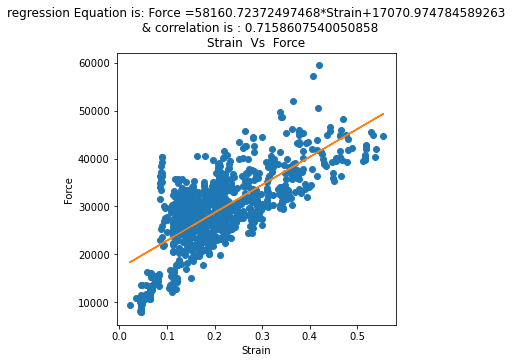

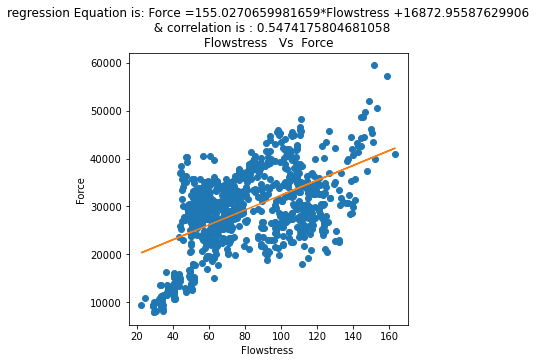

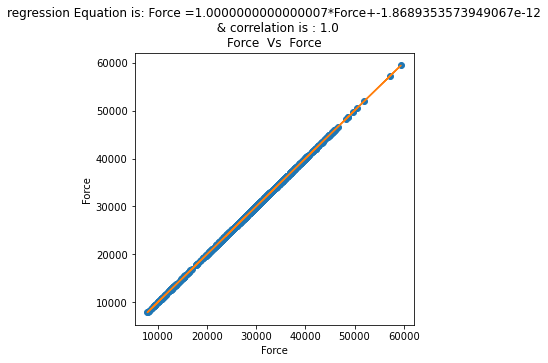

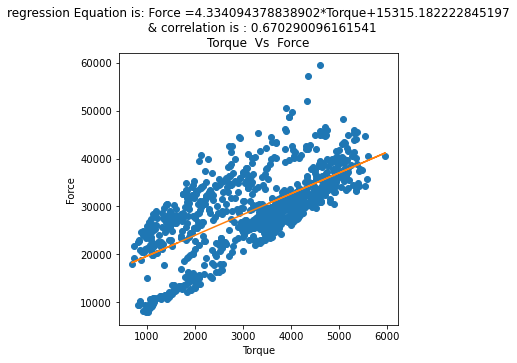

In [15]:
column=list(ndf.columns)
corelated=[]
for i in column:
    
    if (ndf[i].corr(ndf['Force'])>0.5 or ndf[i].corr(ndf['Force'])<-0.5) :
           
        tup=()
        tup=tup+(str(i),str('Force'),ndf[i].corr(ndf['Force']))
        corelated.append(tup)
          
        x = np.array(ndf[i])
        y = np.array(ndf['Force'])
        plt.figure(figsize=(5,5))
        plt.plot(x, y, 'o')
        m, b = np.polyfit(x, y, 1)
        cor=str(ndf[i].corr(ndf['Force']))
        plt.title("regression Equation is: "+str('Force')+' =' +str(m)+'*' + str(i)+ '+' +str(b)+"\n" + "  & correlation is : " +cor + "\n" + str(i) + "  Vs  " + str('Force'))
        plt.plot(x, m*x + b)

        plt.xlabel(str(i))
        plt.ylabel(str('Force'))
        #plt.savefig('CORRELATION- '+str(i) + 'Vs' + str('Force') +'.png')


            

## 7.1 Variables which are highly coreelated (|Correlation| > 0.75) with each other are summerized as below.

In [16]:
for i in corelated:
    print(i,'\n')



('Width', 'Force', 0.5315977613726547) 

('Redn', 'Force', 0.723965069129844) 

('Strain', 'Force', 0.7158607540050858) 

('Flowstress ', 'Force', 0.5474175804681058) 

('Force', 'Force', 1.0) 

('Torque', 'Force', 0.670290096161541) 



# 8. BACKWARD ELIMINATION METHOD TO REMOVE UNNECESSARY COLUMNS

In [17]:
from statsmodels .regression.linear_model import OLS

In [18]:
ndf.shape

(970, 15)

In [19]:
ndf.size

14550

In [20]:
x = np.array(ndf.iloc[:,0:14])
x


array([[2.05000000e+02, 1.12026500e+03, 2.10250000e+02, ...,
        1.58050124e+00, 4.98905250e+01, 2.39080000e+04],
       [2.05000000e+02, 1.12026500e+03, 2.10250000e+02, ...,
        1.29130308e+00, 4.47412597e+01, 3.57480000e+04],
       [2.05000000e+02, 1.12026500e+03, 2.10250000e+02, ...,
        1.36436190e+00, 4.76530617e+01, 3.93270000e+04],
       ...,
       [2.75000000e+02, 1.11527000e+03, 2.69000000e+01, ...,
        3.64530994e+00, 9.73742804e+01, 3.48540000e+04],
       [2.75000000e+02, 1.11527000e+03, 2.69000000e+01, ...,
        3.58505413e+00, 1.00201452e+02, 3.11620000e+04],
       [2.75000000e+02, 1.11527000e+03, 2.69000000e+01, ...,
        3.43786731e+00, 1.00384365e+02, 2.80720000e+04]])

In [21]:
y = np.array(ndf.iloc[:,-1])
y=y.reshape((-1,1))


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2022)

In [23]:
print("Shape of Training Input",x_train.shape)
print("Shape of Training Output",y_train.shape)

print("Shape of Testing Input",x_test.shape)
print("Shape of Testing Output",y_test.shape)

Shape of Training Input (776, 14)
Shape of Training Output (776, 1)
Shape of Testing Input (194, 14)
Shape of Testing Output (194, 1)


In [24]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = mlr.predict(x_test)

In [26]:
for i in range(0,len(y_pred)):
    Actual= y_test[i]
    Predict= y_pred[i]

In [27]:
mlr.score(x,y) 

0.9669358974545627

In [28]:
import statsmodels.formula.api as smf

In [29]:
x.shape

(970, 14)

In [30]:
x_for_statsmodel= np.append(arr = np.ones((970,1)).astype(int),values =x,axis=1)

In [31]:
from statsmodels .regression.linear_model import OLS

In [32]:
model = OLS(endog = y,exog = x_for_statsmodel)  #endog is our dependent variable,exdog means our independent variable

In [33]:
model = model.fit()

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2007.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:04:17   Log-Likelihood:                -6638.9
No. Observations:                 970   AIC:                         1.331e+04
Df Residuals:                     955   BIC:                         1.338e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5496.6850    530.991    -10.352      0.0

**Here p-value is higher for X7 variable so we will eliminate that column**

In [35]:
x_for_statsmodel = x_for_statsmodel[:,[0,1,2,3,4,5,6,8,9,10,11,12,13]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1335.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:04:17   Log-Likelihood:                -6900.5
No. Observations:                 970   AIC:                         1.383e+04
Df Residuals:                     957   BIC:                         1.389e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8787.4393    410.654    -21.399      0.0

**After eliminating X7 column or R-square and adjusted R-square value is decreasing so  we cannot eliminate any of the column from given dataset. All columns are important for this anlysis.**

# 9. Distributional Analysis
## 9.1 Normal Distribution:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

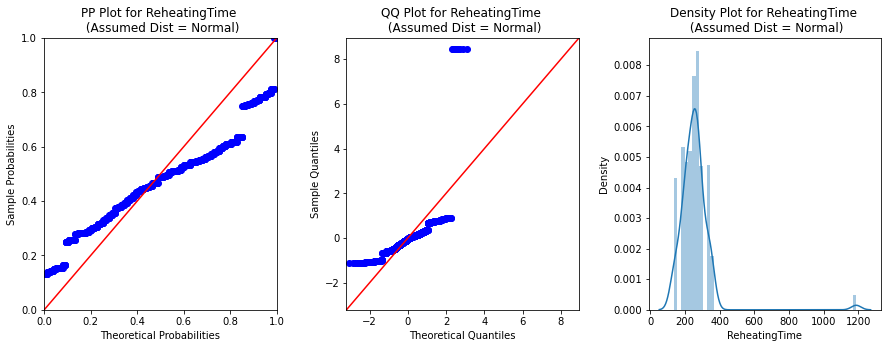

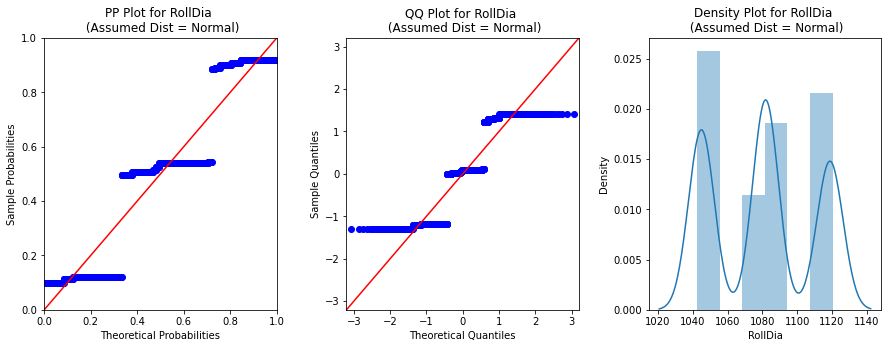

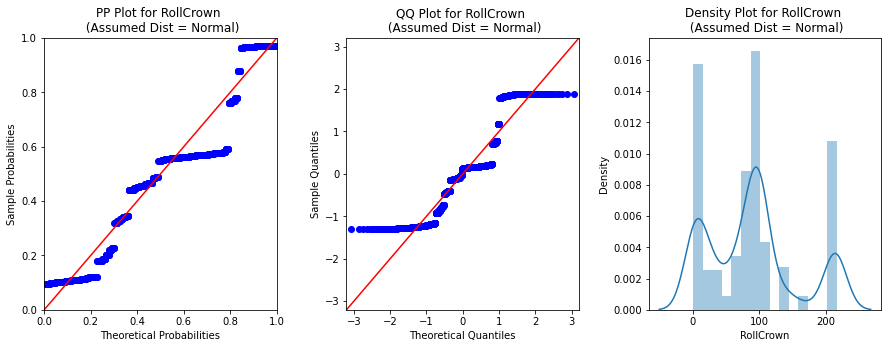

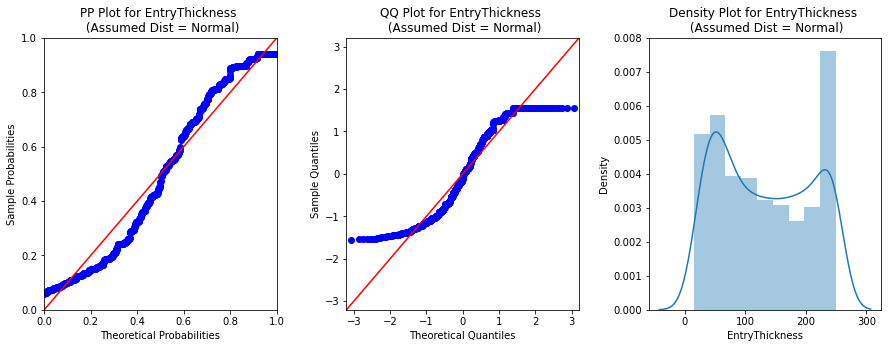

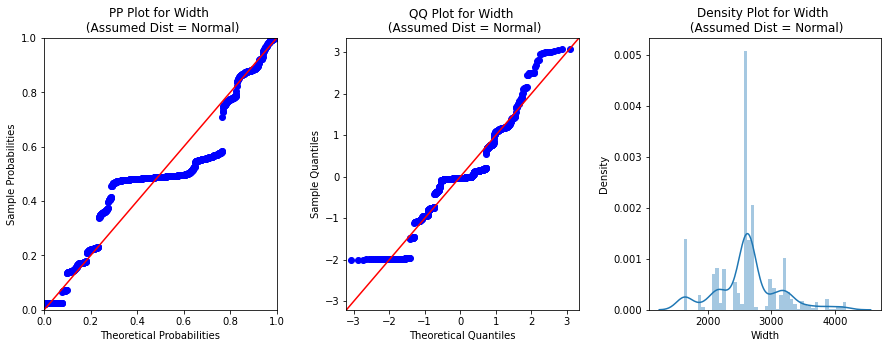

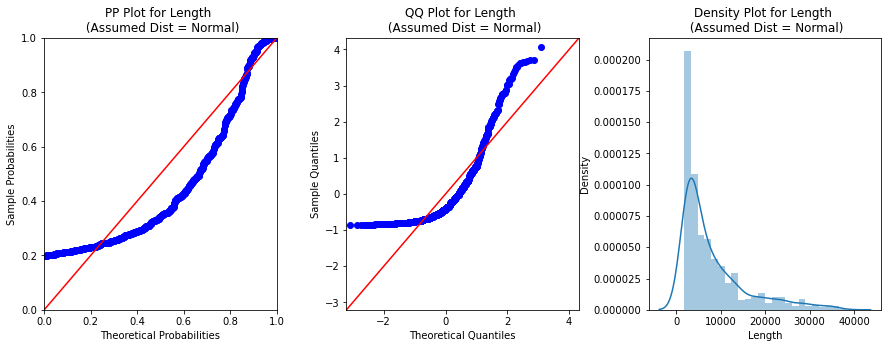

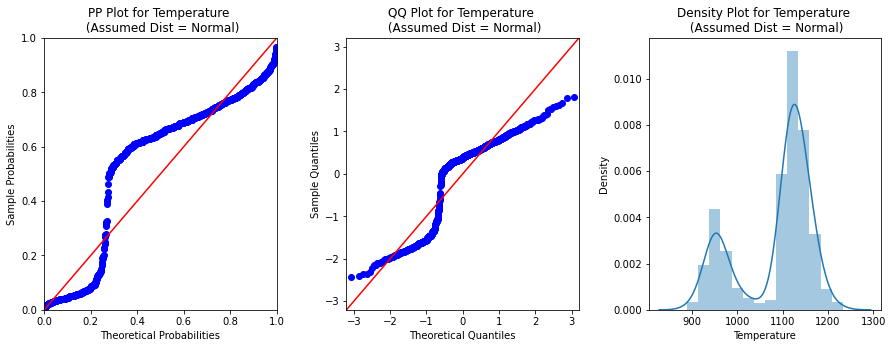

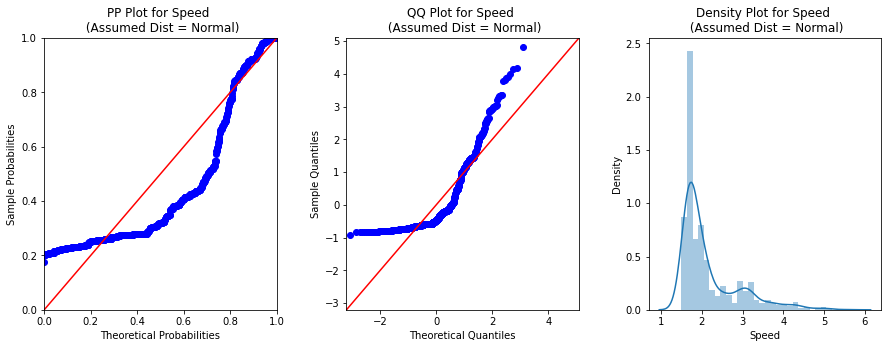

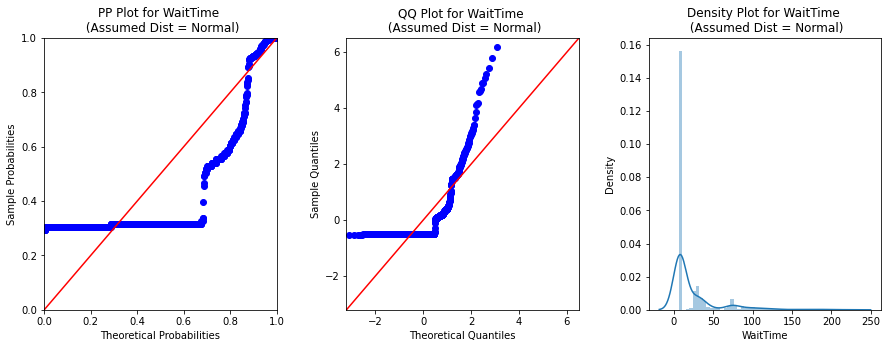

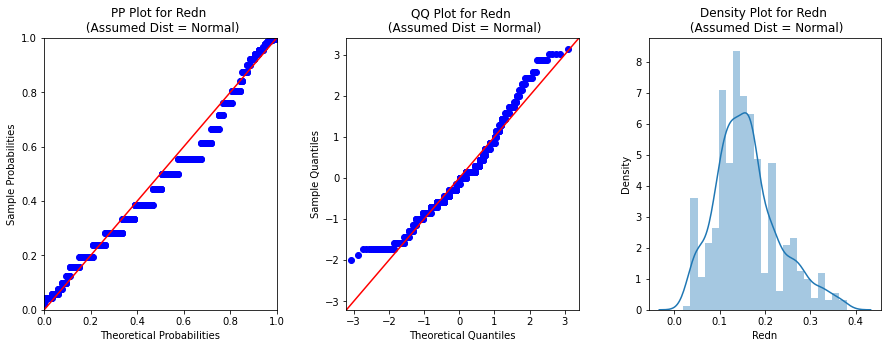

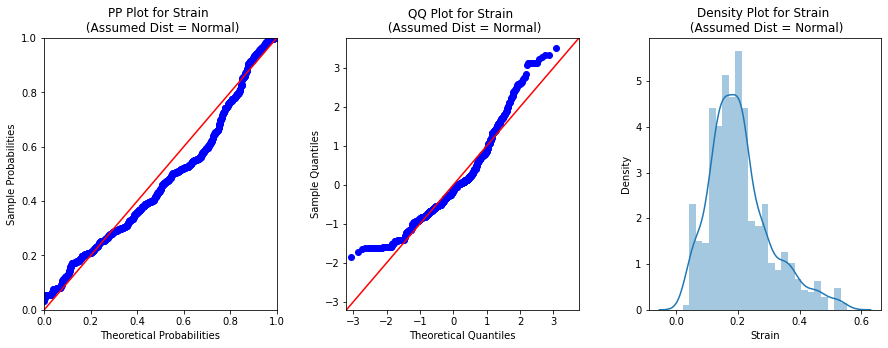

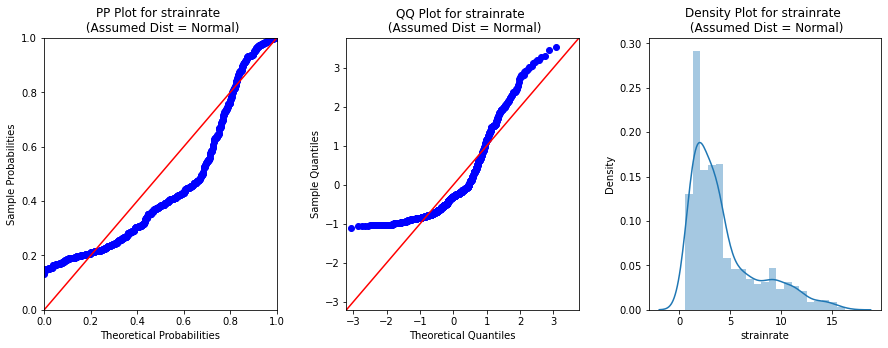

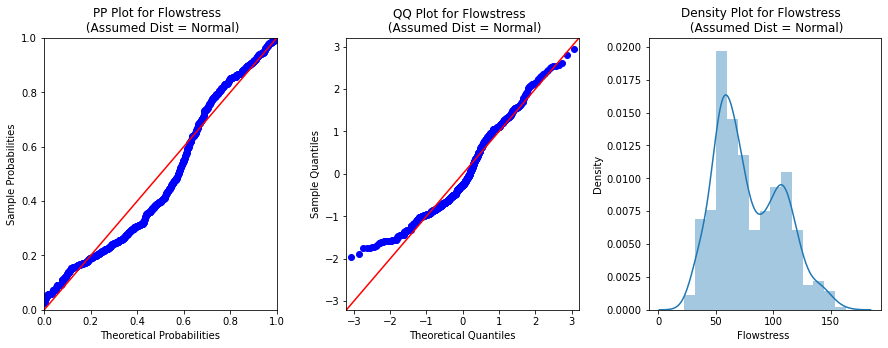

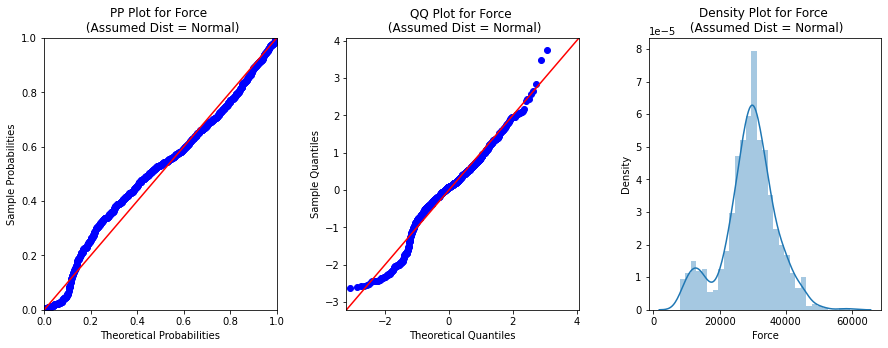

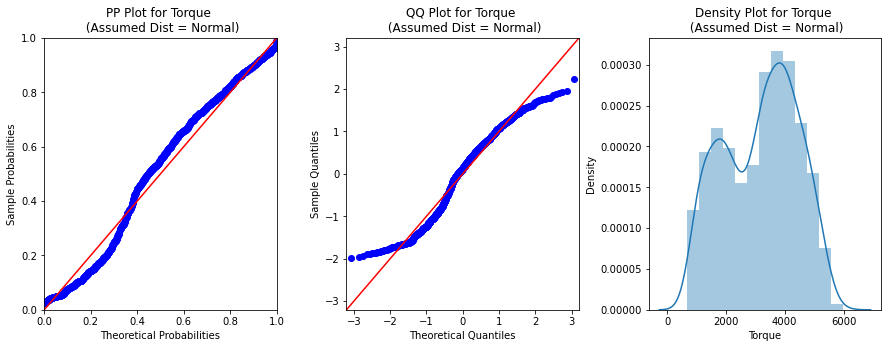

In [36]:
import statsmodels.graphics.gofplots as sm 
import numpy as np
from scipy import stats
column=list(ndf.columns)
for i in column:
    df2  = ndf[i]
   
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.subplots_adjust(hspace=0.8, wspace=.3)
    sm.ProbPlot(np.array(df2),fit=True,dist=stats.norm).ppplot(line='45',ax=ax[0])
    ax[0].set_title("PP Plot for " + str(i) + " \n (Assumed Dist = Normal)")
    #plt.show()
    sm.ProbPlot(np.array(df2),fit=True,dist=stats.norm).qqplot(line='45',ax=ax[1])
    ax[1].set_title("QQ Plot for " + str(i) + " \n (Assumed Dist = Normal)")
    #plt.show()
    sns.distplot(df2,ax=ax[2])
    ax[2].set_title("Density Plot for " + str(i)+ " \n (Assumed Dist = Normal)")
    #plt.savefig(str(i)+".png")
    #plt.show()

## 9.2 Lognormal Distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

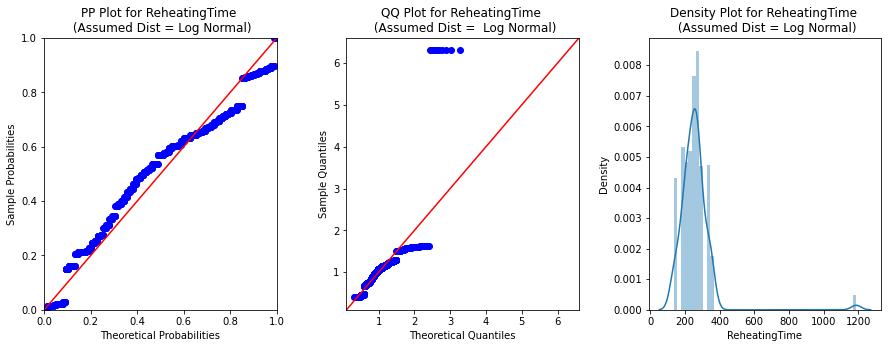

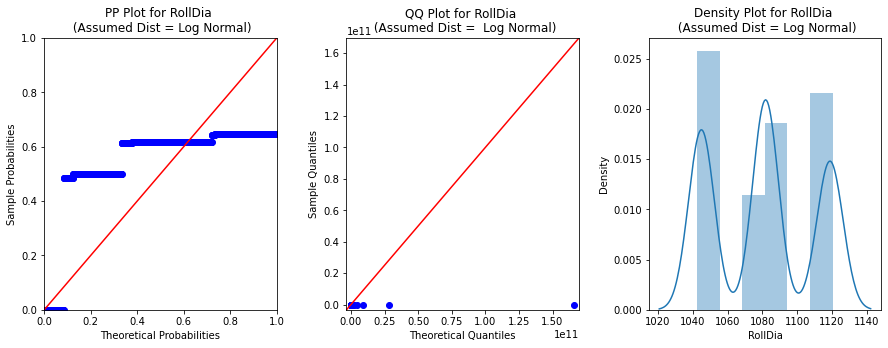

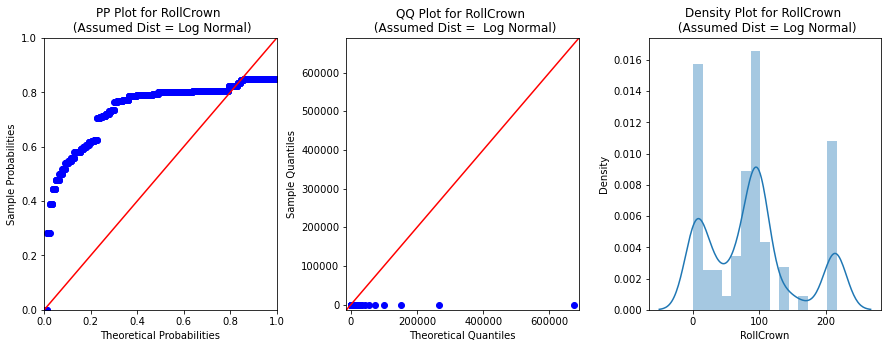

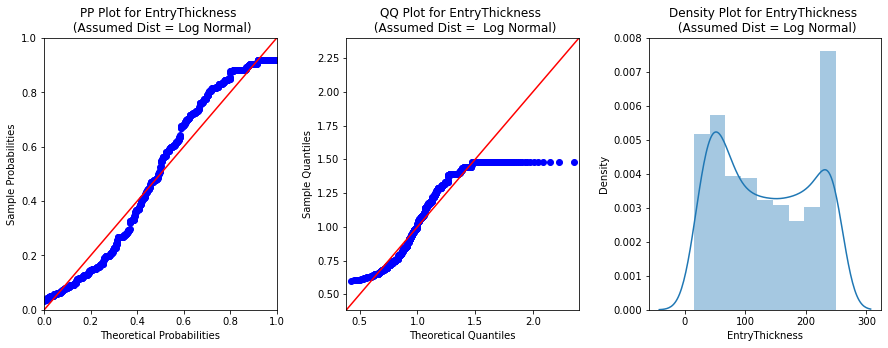

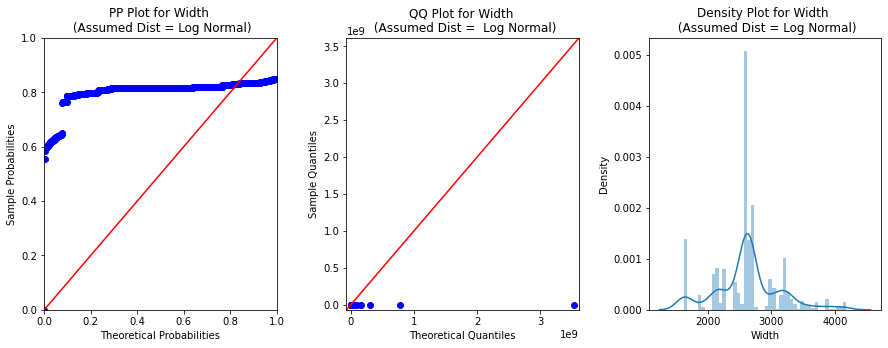

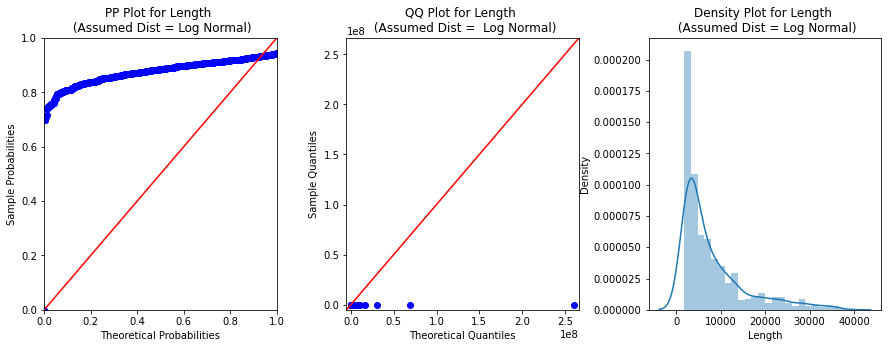

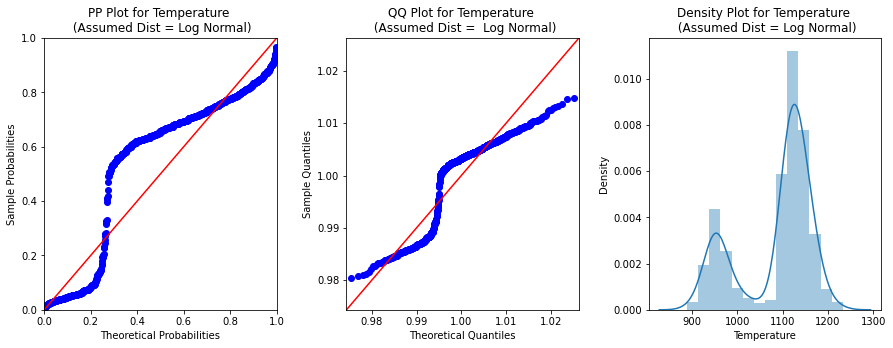

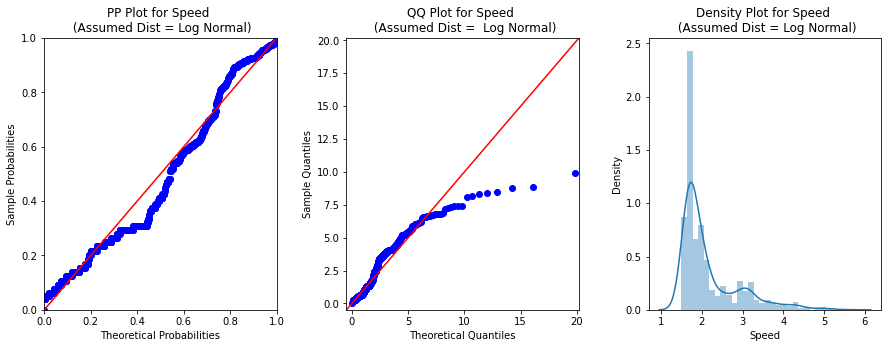

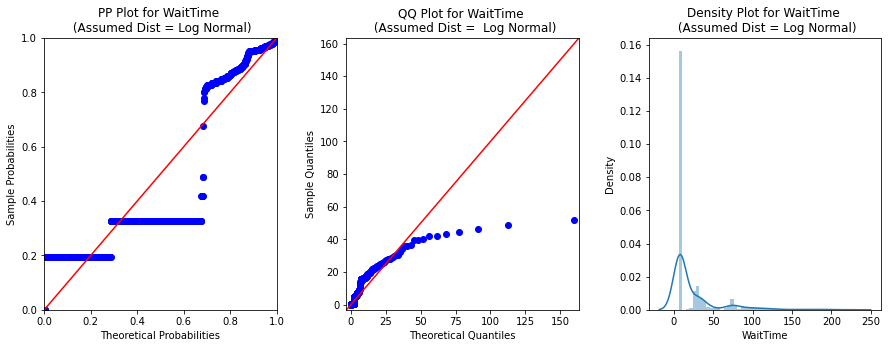

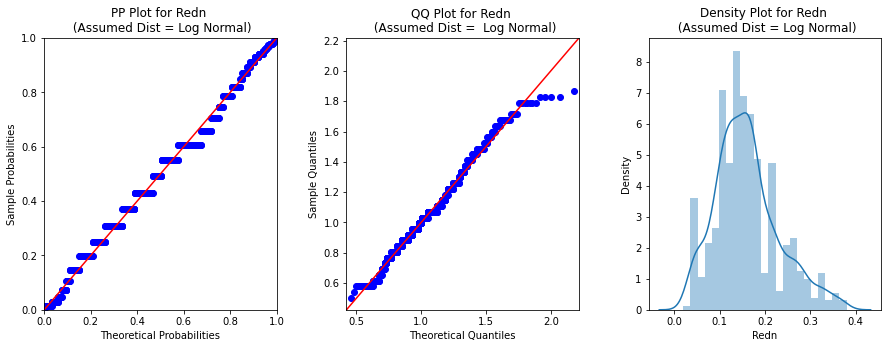

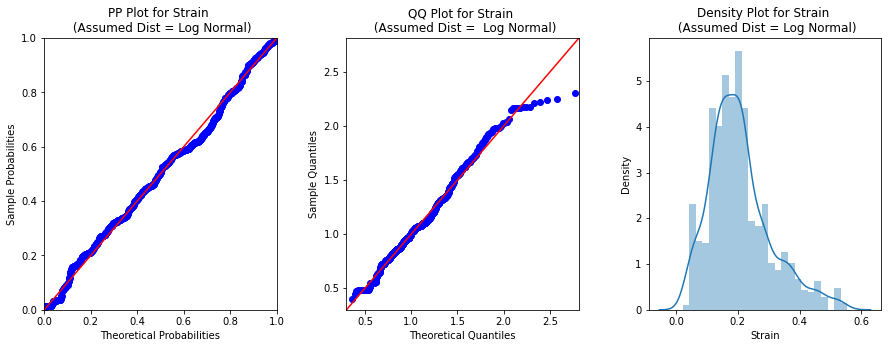

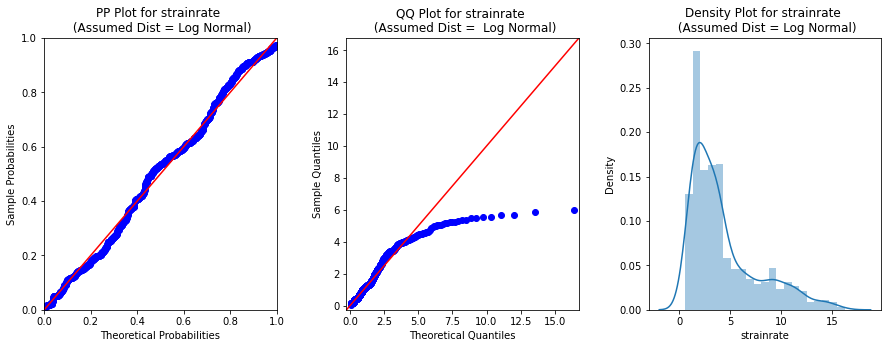

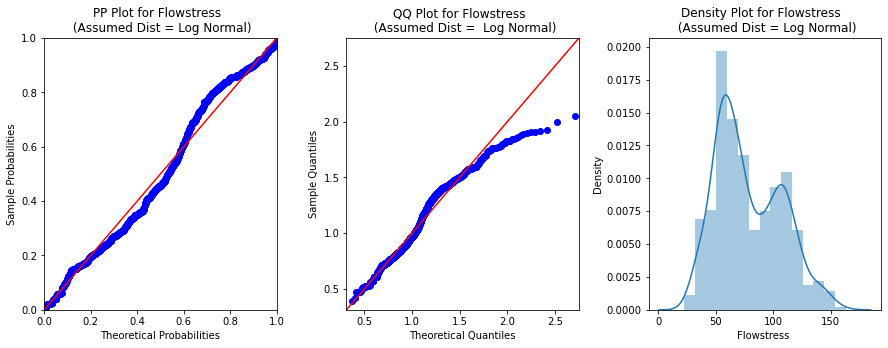

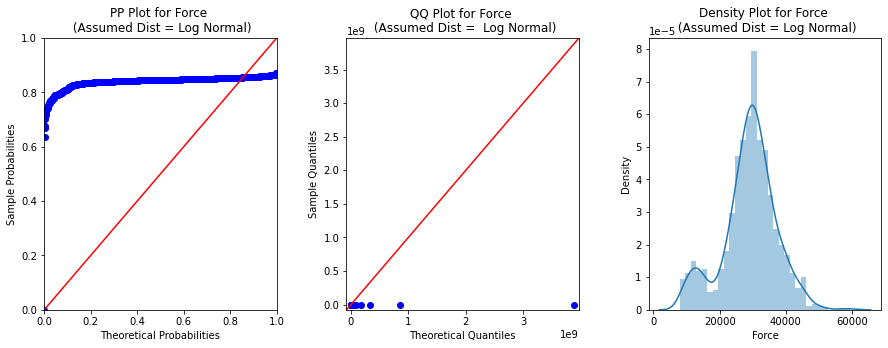

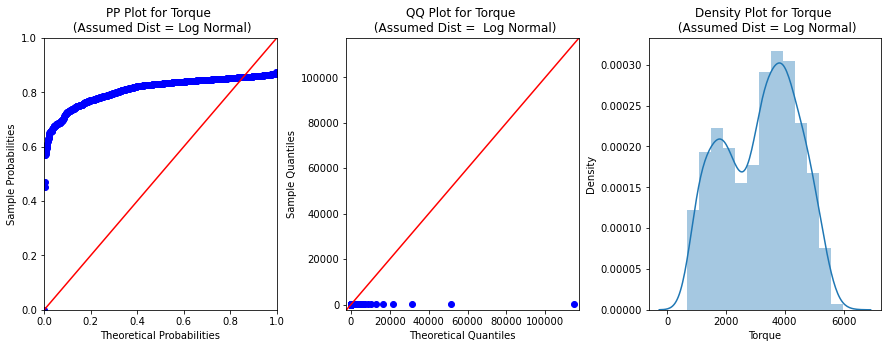

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [37]:
column=list(ndf.columns)
for i in column:
    df2  = ndf[i]
   
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.subplots_adjust(hspace=0.8, wspace=.3)
    sm.ProbPlot(np.array(df2),fit=True,dist=stats.lognorm).ppplot(line='45',ax=ax[0])
    ax[0].set_title("PP Plot for " + str(i) + " \n (Assumed Dist = Log Normal)")
    #plt.show()
    sm.ProbPlot(np.array(df2),fit=True,dist=stats.lognorm).qqplot(line='45',ax=ax[1])
    ax[1].set_title("QQ Plot for " + str(i) + " \n (Assumed Dist =  Log Normal)")
    #plt.show()
    sns.distplot(df2,ax=ax[2])
    ax[2].set_title("Density Plot for " + str(i)+ " \n (Assumed Dist = Log Normal)")
    #plt.savefig(str(i)+".png")
    #plt.show()